In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
df = pd.read_csv('hotel_bookings.csv')
print(df.shape)
df.head()

(119390, 32)


hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1                        0                     0       2  ...    No Deposit   
2                        0                     1       1  ...    No Deposit   
3                        0                     1       1  ...    No Deposit   
4                        0                     2       2  ...    No Deposit   

   agent company days_in_waiting_list customer_type   adr  \
0    NaN     NaN                    0     Transient   0.0   
1    NaN     NaN                    0     Transient   0.0   
2    NaN     NaN                    0     Transient  75.0   
3  304.0     NaN                    0     Transient  75.0   
4  240.0     NaN                    0     Transient  98.0   

   required_car_parking_spaces  total_of_special_requests  reservation_status  \
0                            0                          0           Check-Out   
1                            0                          0           Check-Out   
2                            0                          0           Check-Out   
3                            0                          0           Check-Out   
4                            0                          1           Check-Out   

  reservation_status_date  
0              2015-07-01  
1              2015-07-01  
2              2015-07-02  
3              2015-07-02  
4              2015-07-03  

[5 rows x 32 columns]

## Exploratory Data Analysis (EDA)

In [3]:
# descriptive statistics

def data_quality_report(df):
    
    if isinstance(df, pd.core.frame.DataFrame):
        
        descriptive_statistics = df.describe(include = 'all')
        data_types = pd.DataFrame(df.dtypes, columns=['Data Type']).transpose()
        missing_value_counts = pd.DataFrame(df.isnull().sum(), columns=['Missing Values']).transpose()
        present_value_counts = pd.DataFrame(df.count(), columns=['Present Values']).transpose()
        data_report = pd.concat([descriptive_statistics, data_types, missing_value_counts, present_value_counts], axis=0)
        return data_report
    
    else:
        return None

data_quality_report(df)

hotel is_canceled   lead_time arrival_date_year  \
count               119390    119390.0    119390.0          119390.0   
unique                   2         NaN         NaN               NaN   
top             City Hotel         NaN         NaN               NaN   
freq                 79330         NaN         NaN               NaN   
mean                   NaN    0.370416  104.011416       2016.156554   
std                    NaN    0.482918  106.863097          0.707476   
min                    NaN         0.0         0.0            2015.0   
25%                    NaN         0.0        18.0            2016.0   
50%                    NaN         0.0        69.0            2016.0   
75%                    NaN         1.0       160.0            2017.0   
max                    NaN         1.0       737.0            2017.0   
Data Type           object       int64       int64             int64   
Missing Values           0           0           0                 0   
Present Values      119390      119390      119390            119390   

               arrival_date_month arrival_date_week_number  \
count                      119390                 119390.0   
unique                         12                      NaN   
top                        August                      NaN   
freq                        13877                      NaN   
mean                          NaN                27.165173   
std                           NaN                13.605138   
min                           NaN                      1.0   
25%                           NaN                     16.0   
50%                           NaN                     28.0   
75%                           NaN                     38.0   
max                           NaN                     53.0   
Data Type                  object                    int64   
Missing Values                  0                        0   
Present Values             119390                   119390   

               arrival_date_day_of_month stays_in_weekend_nights  \
count                           119390.0                119390.0   
unique                               NaN                     NaN   
top                                  NaN                     NaN   
freq                                 NaN                     NaN   
mean                           15.798241                0.927599   
std                             8.780829                0.998613   
min                                  1.0                     0.0   
25%                                  8.0                     0.0   
50%                                 16.0                     1.0   
75%                                 23.0                     2.0   
max                                 31.0                    19.0   
Data Type                          int64                   int64   
Missing Values                         0                       0   
Present Values                    119390                  119390   

               stays_in_week_nights    adults  ... deposit_type       agent  \
count                      119390.0  119390.0  ...       119390    103050.0   
unique                          NaN       NaN  ...            3         NaN   
top                             NaN       NaN  ...   No Deposit         NaN   
freq                            NaN       NaN  ...       104641         NaN   
mean                       2.500302  1.856403  ...          NaN   86.693382   
std                        1.908286  0.579261  ...          NaN  110.774548   
min                             0.0       0.0  ...          NaN         1.0   
25%                             1.0       2.0  ...          NaN         9.0   
50%                             2.0       2.0  ...          NaN        14.0   
75%                             3.0       2.0  ...          NaN       229.0   
max                            50.0      55.0  ...          NaN       535.0   
Data Type                     int64     

In [4]:
data_quality_report(df).loc['min']

hotel                                NaN
is_canceled                          0.0
lead_time                            0.0
arrival_date_year                 2015.0
arrival_date_month                   NaN
arrival_date_week_number             1.0
arrival_date_day_of_month            1.0
stays_in_weekend_nights              0.0
stays_in_week_nights                 0.0
adults                               0.0
children                             0.0
babies                               0.0
meal                                 NaN
country                              NaN
market_segment                       NaN
distribution_channel                 NaN
is_repeated_guest                    0.0
previous_cancellations               0.0
previous_bookings_not_canceled       0.0
reserved_room_type                   NaN
assigned_room_type                   NaN
booking_changes                      0.0
deposit_type                         NaN
agent                                1.0
company         

In [5]:
data_quality_report(df).loc['max']

hotel                                NaN
is_canceled                          1.0
lead_time                          737.0
arrival_date_year                 2017.0
arrival_date_month                   NaN
arrival_date_week_number            53.0
arrival_date_day_of_month           31.0
stays_in_weekend_nights             19.0
stays_in_week_nights                50.0
adults                              55.0
children                            10.0
babies                              10.0
meal                                 NaN
country                              NaN
market_segment                       NaN
distribution_channel                 NaN
is_repeated_guest                    1.0
previous_cancellations              26.0
previous_bookings_not_canceled      72.0
reserved_room_type                   NaN
assigned_room_type                   NaN
booking_changes                     21.0
deposit_type                         NaN
agent                              535.0
company         

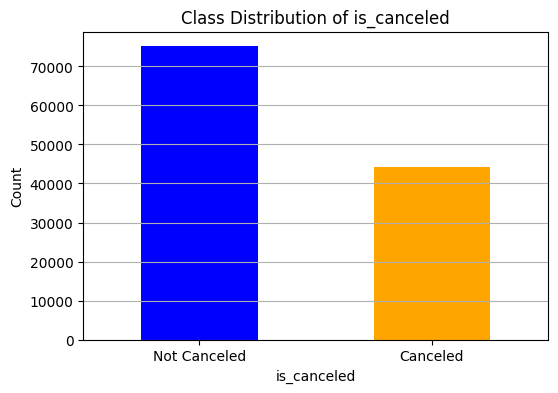

Class Counts:
0    75166
1    44224
Name: is_canceled, dtype: int64


In [6]:
# checking class balance

class_counts = df['is_canceled'].value_counts()
plt.figure(figsize=(6, 4))
class_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Class Distribution of is_canceled')
plt.xlabel('is_canceled')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Canceled', 'Canceled'], rotation=0)
plt.grid(axis='y')
plt.show()

print("Class Counts:")
print(class_counts)

In [7]:
target_col = 'is_canceled'
categorical_cols = ['hotel', 'meal', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status']
excluded_col = 'country'
numerical_cols = [col for col in df.columns if col != target_col and col != excluded_col and col not in categorical_cols]

In [8]:
numerical_cols

['lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'agent',
 'company',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status_date']

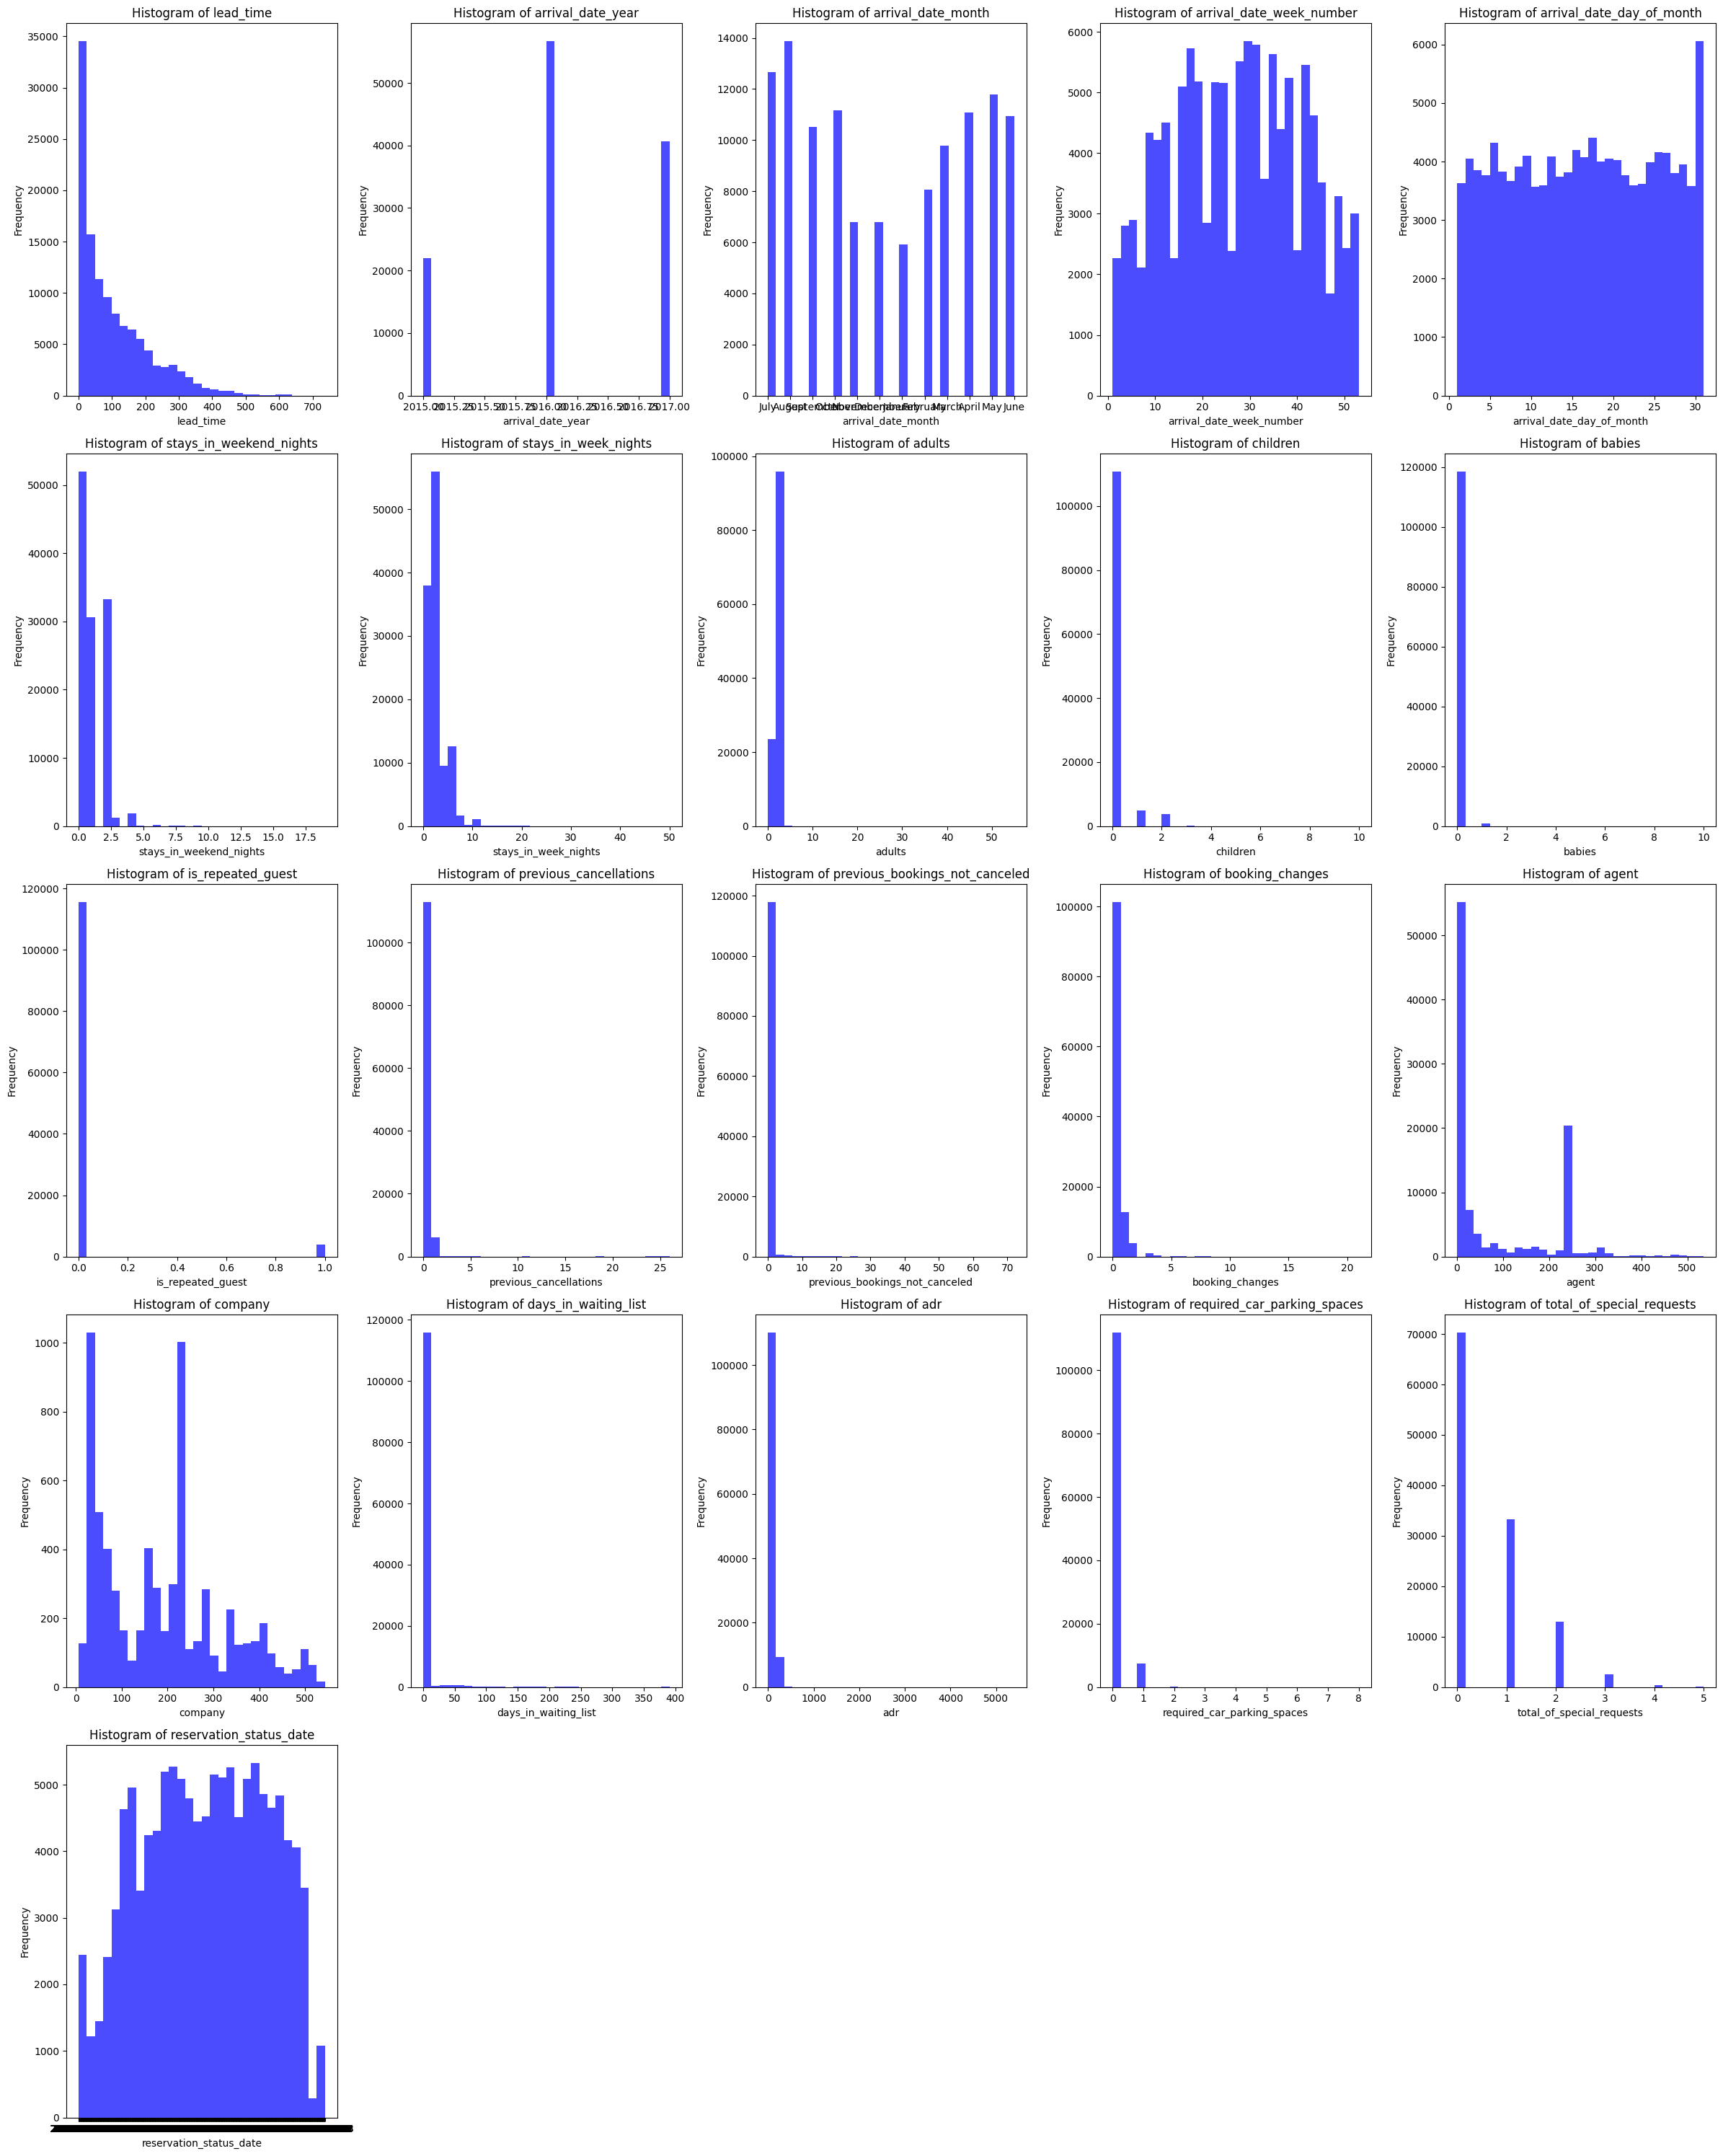

In [9]:
# historgram of numerical plots

num_plots = len(numerical_cols)
num_cols = 5
num_rows = -(-num_plots // num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(24, 6*num_rows))
for i, col in enumerate(numerical_cols):
    row_idx = i // num_cols
    col_idx = i % num_cols
    ax = axes[row_idx, col_idx] if num_rows > 1 else axes[col_idx]
    
    ax.hist(df[col], bins=30, color='blue', alpha=0.7)
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    ax.set_title(f'Histogram of {col}')

for i in range(num_plots, num_rows * num_cols):
    row_idx = i // num_cols
    col_idx = i % num_cols
    axes[row_idx, col_idx].axis('off')
    
plt.tight_layout()
plt.show()

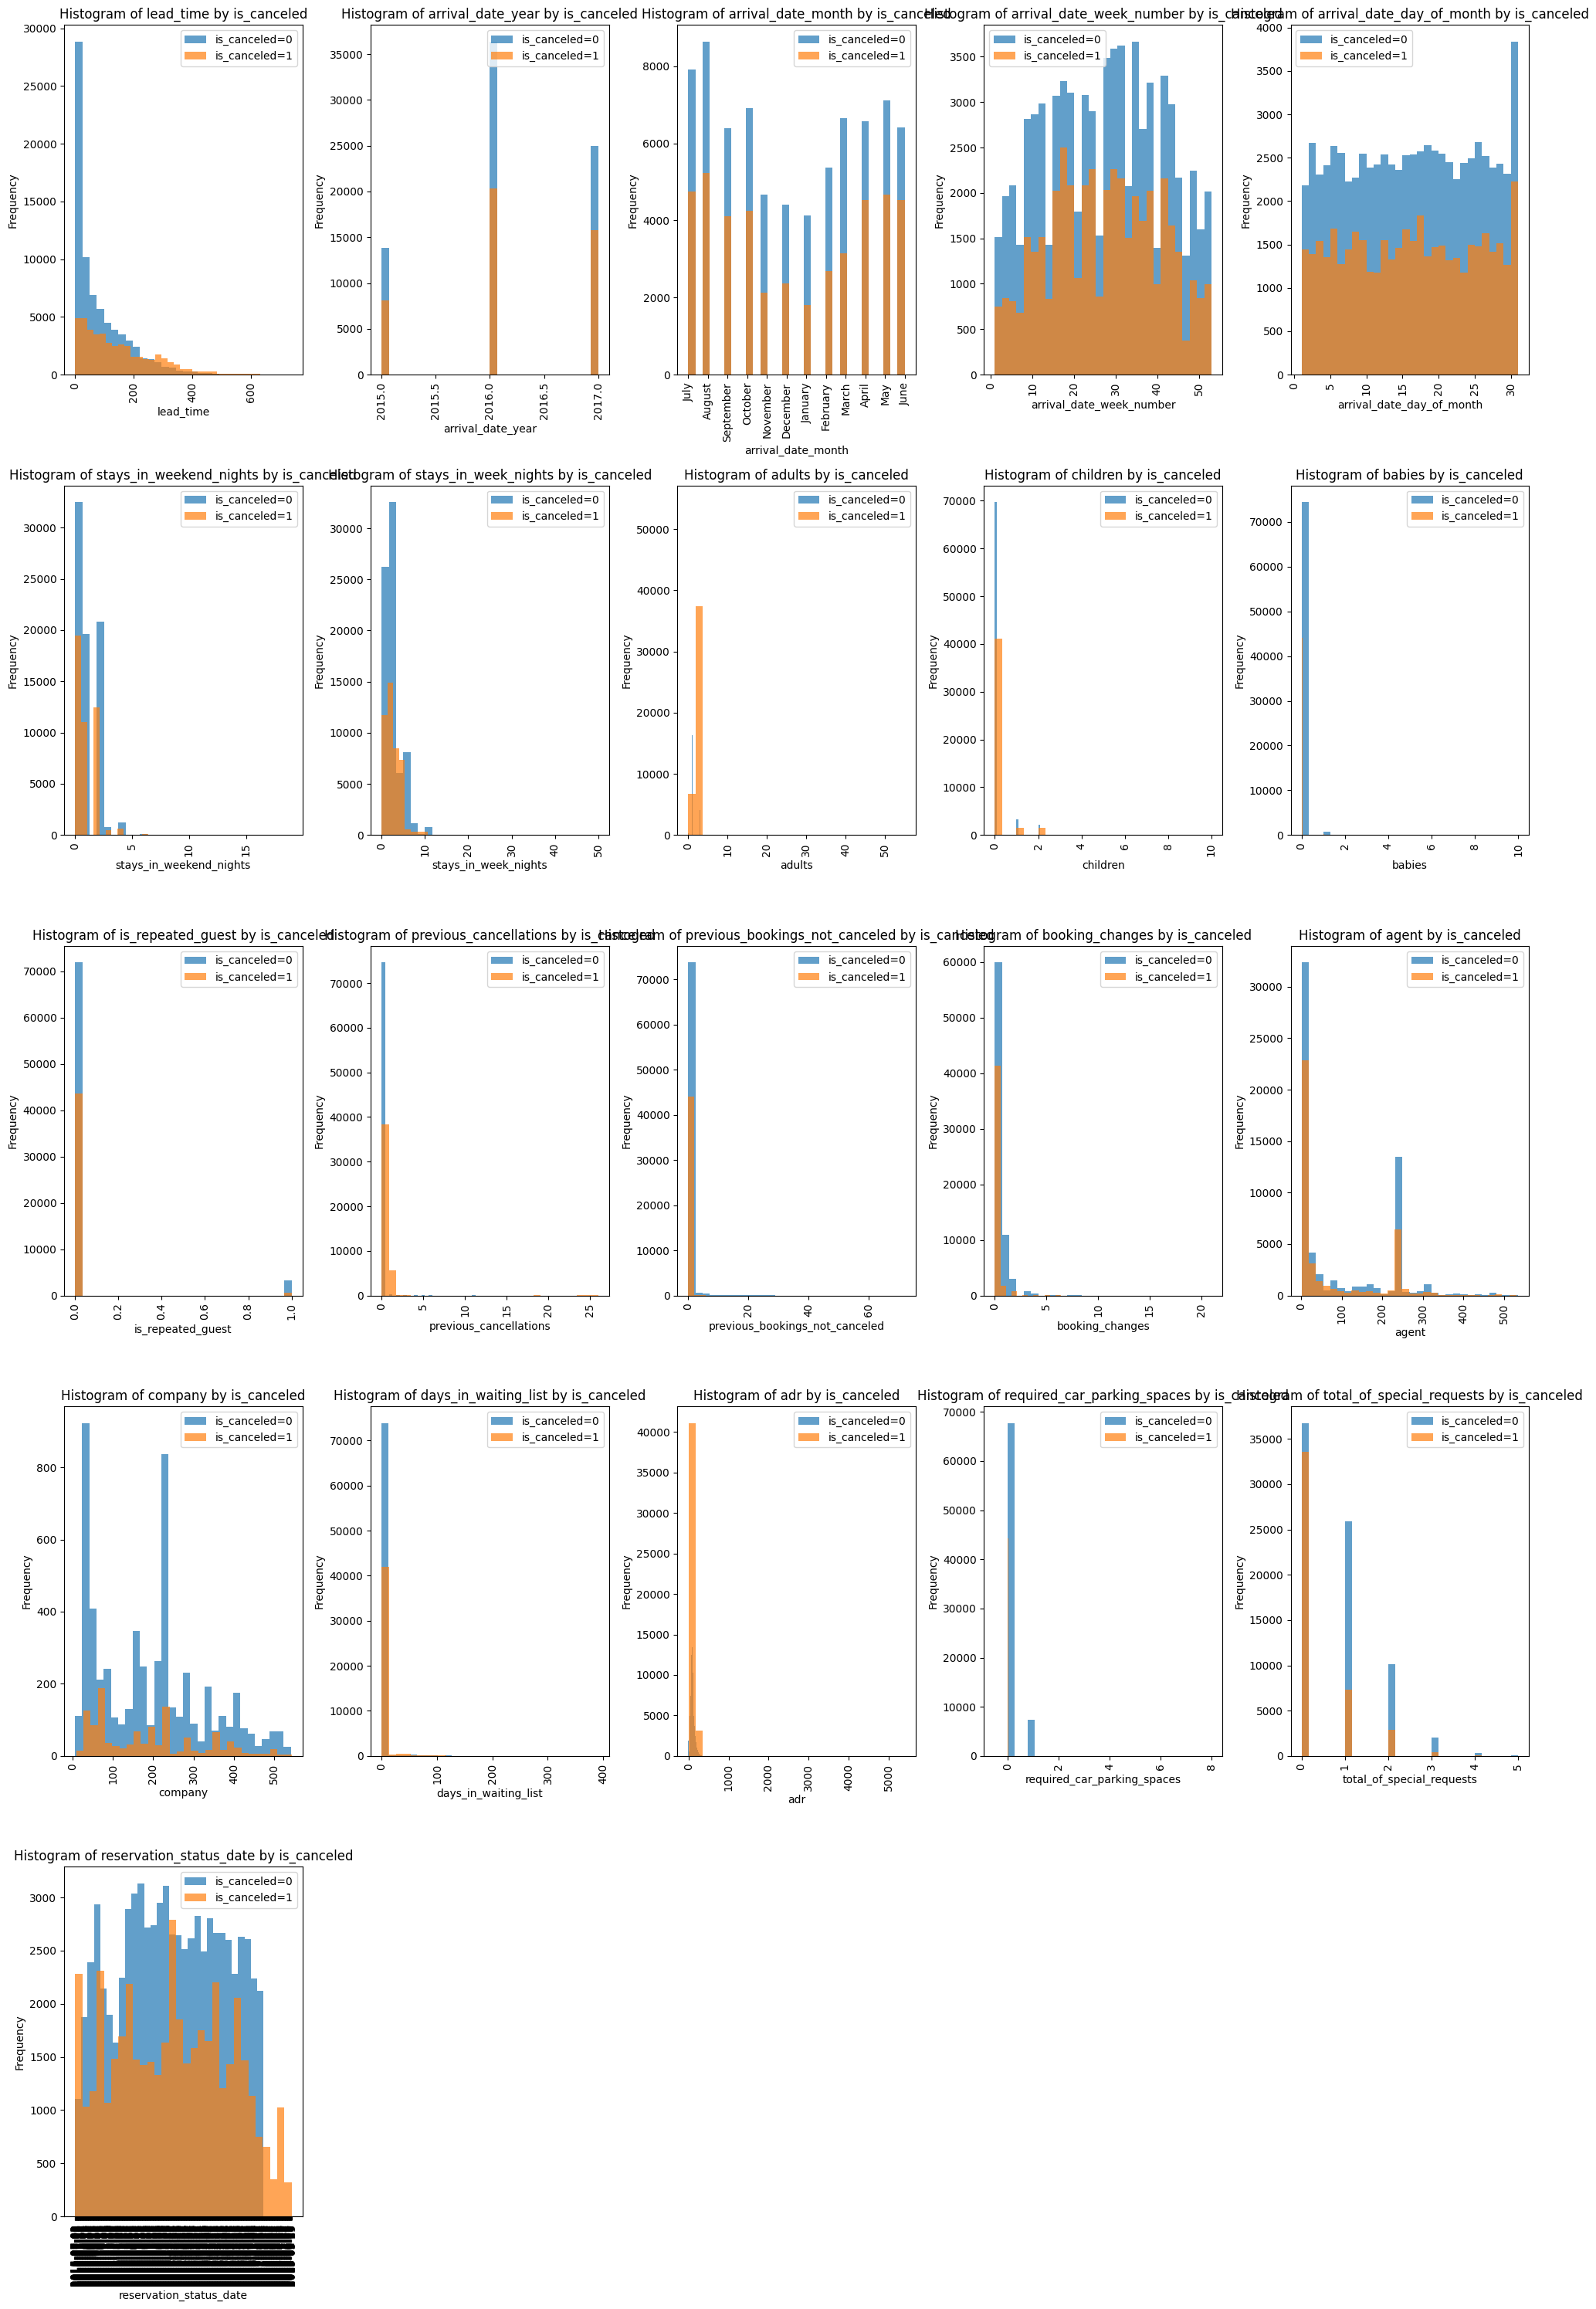

In [10]:
# historgram of numerical plots broken down by target variable is_canceled

num_plots = len(numerical_cols)
num_cols = 5
num_rows = -(-num_plots // num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 6*num_rows))
for i, col in enumerate(numerical_cols):
    row_idx = i // num_cols
    col_idx = i % num_cols
    
    for status in df['is_canceled'].unique():
        ax = axes[row_idx, col_idx] if num_rows > 1 else axes[col_idx]
        ax.hist(df[df['is_canceled'] == status][col], bins=30, alpha=0.7, label=f'is_canceled={status}')
        ax.set_xlabel(col)
        ax.set_ylabel('Frequency')
        ax.set_title(f'Histogram of {col} by is_canceled')
        ax.tick_params(axis='x', rotation=90) 
        ax.legend()

for i in range(num_plots, num_rows * num_cols):
    row_idx = i // num_cols
    col_idx = i % num_cols
    axes[row_idx, col_idx].axis('off')

plt.tight_layout()
plt.show()

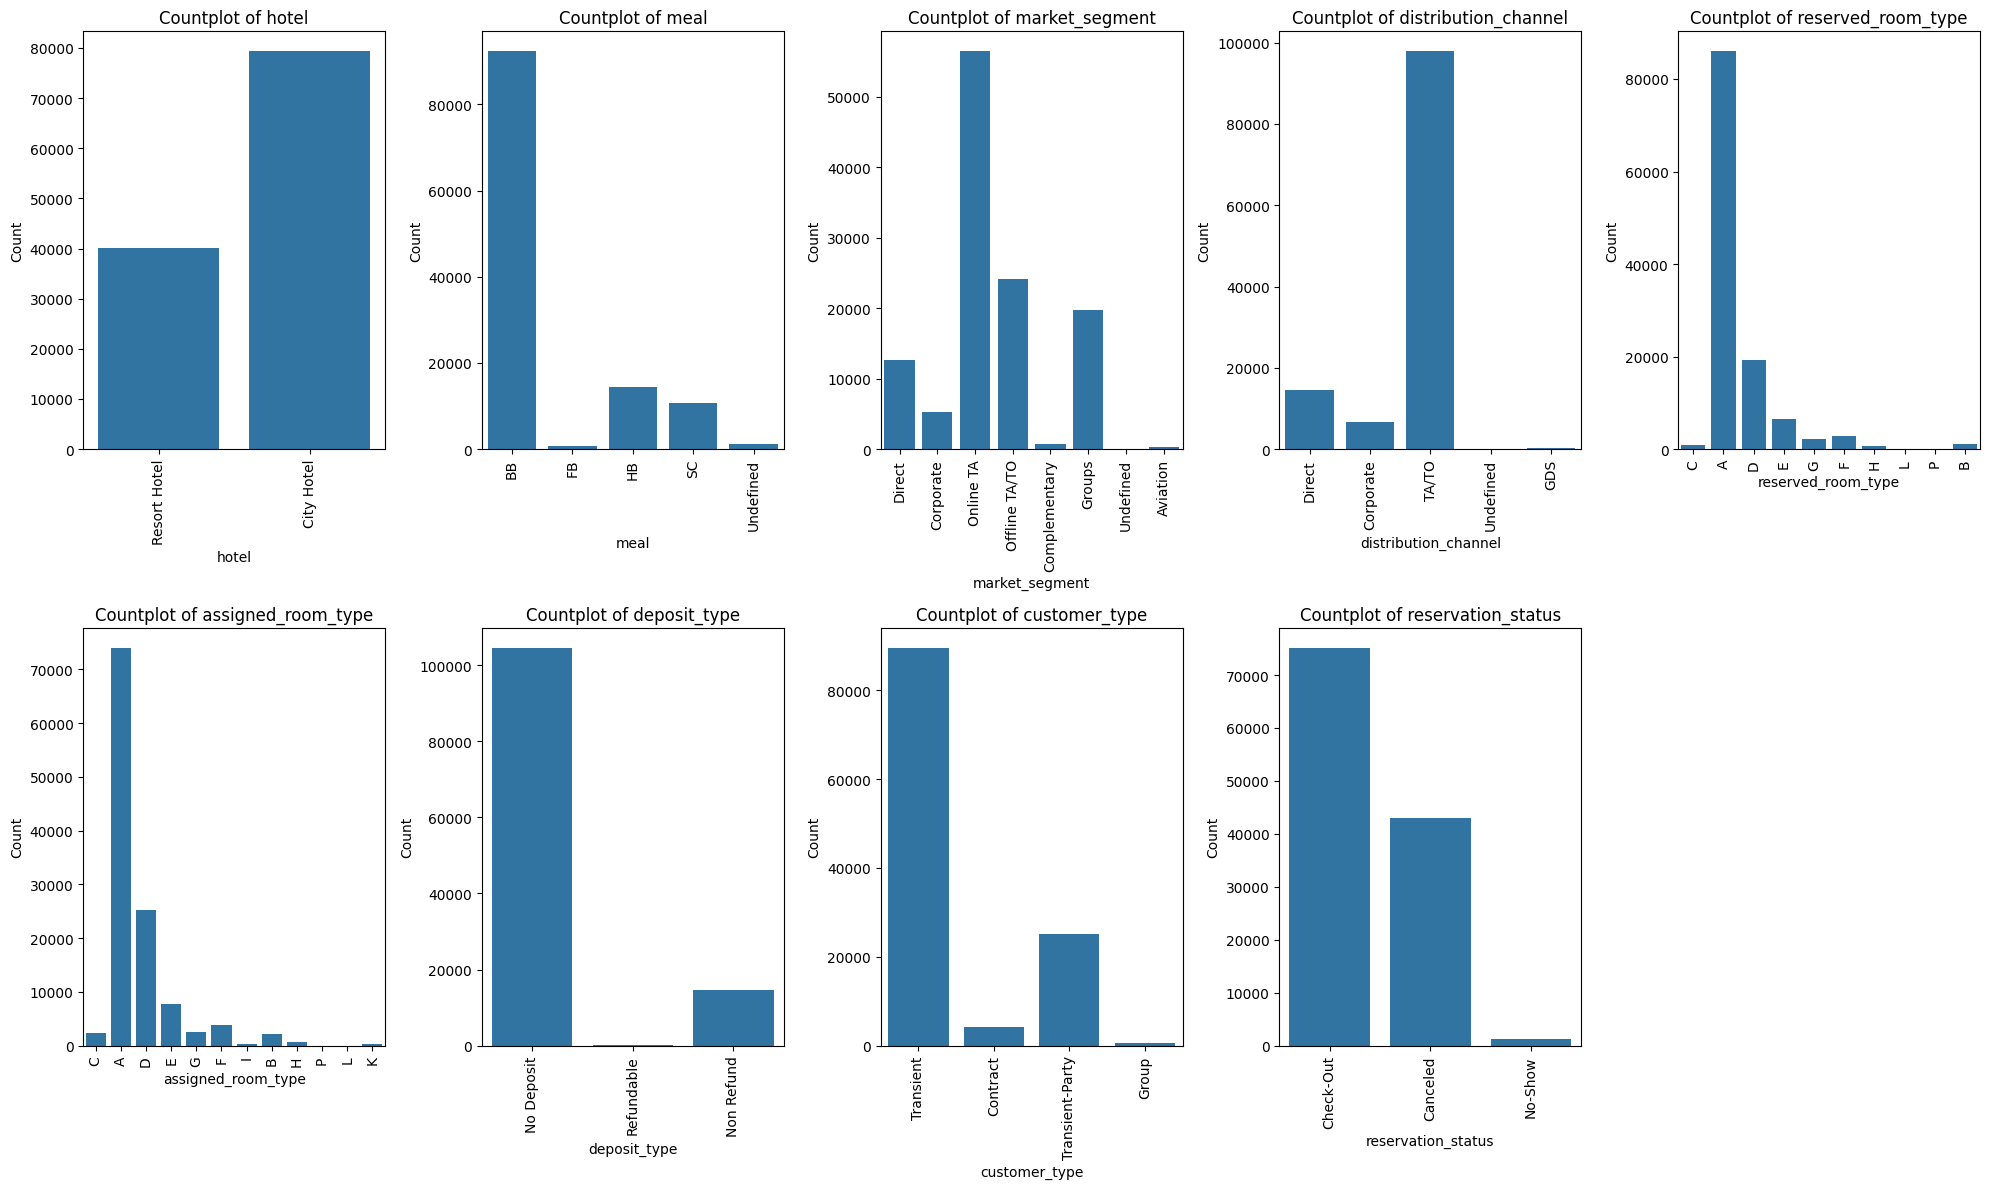

In [11]:
# Countplots for categorical columns

num_plots_cat = len(categorical_cols)
num_cols_cat = 5
num_rows_cat = -(-num_plots_cat // num_cols_cat)

fig, axes = plt.subplots(num_rows_cat, num_cols_cat, figsize=(20, 6*num_rows_cat))
for i, col in enumerate(categorical_cols):
    row_idx = i // num_cols_cat
    col_idx = i % num_cols_cat
    ax = axes[row_idx, col_idx] if num_rows_cat > 1 else axes[col_idx]
    
    sns.countplot(x=col, data=df, ax=ax)
    ax.set_xlabel(col)
    ax.set_ylabel('Count')
    ax.set_title(f'Countplot of {col}')
    ax.tick_params(axis='x', rotation=90) 

for i in range(num_plots_cat, num_rows_cat * num_cols_cat):
    row_idx = i // num_cols_cat
    col_idx = i % num_cols_cat
    axes[row_idx, col_idx].axis('off')

plt.tight_layout()
plt.show()

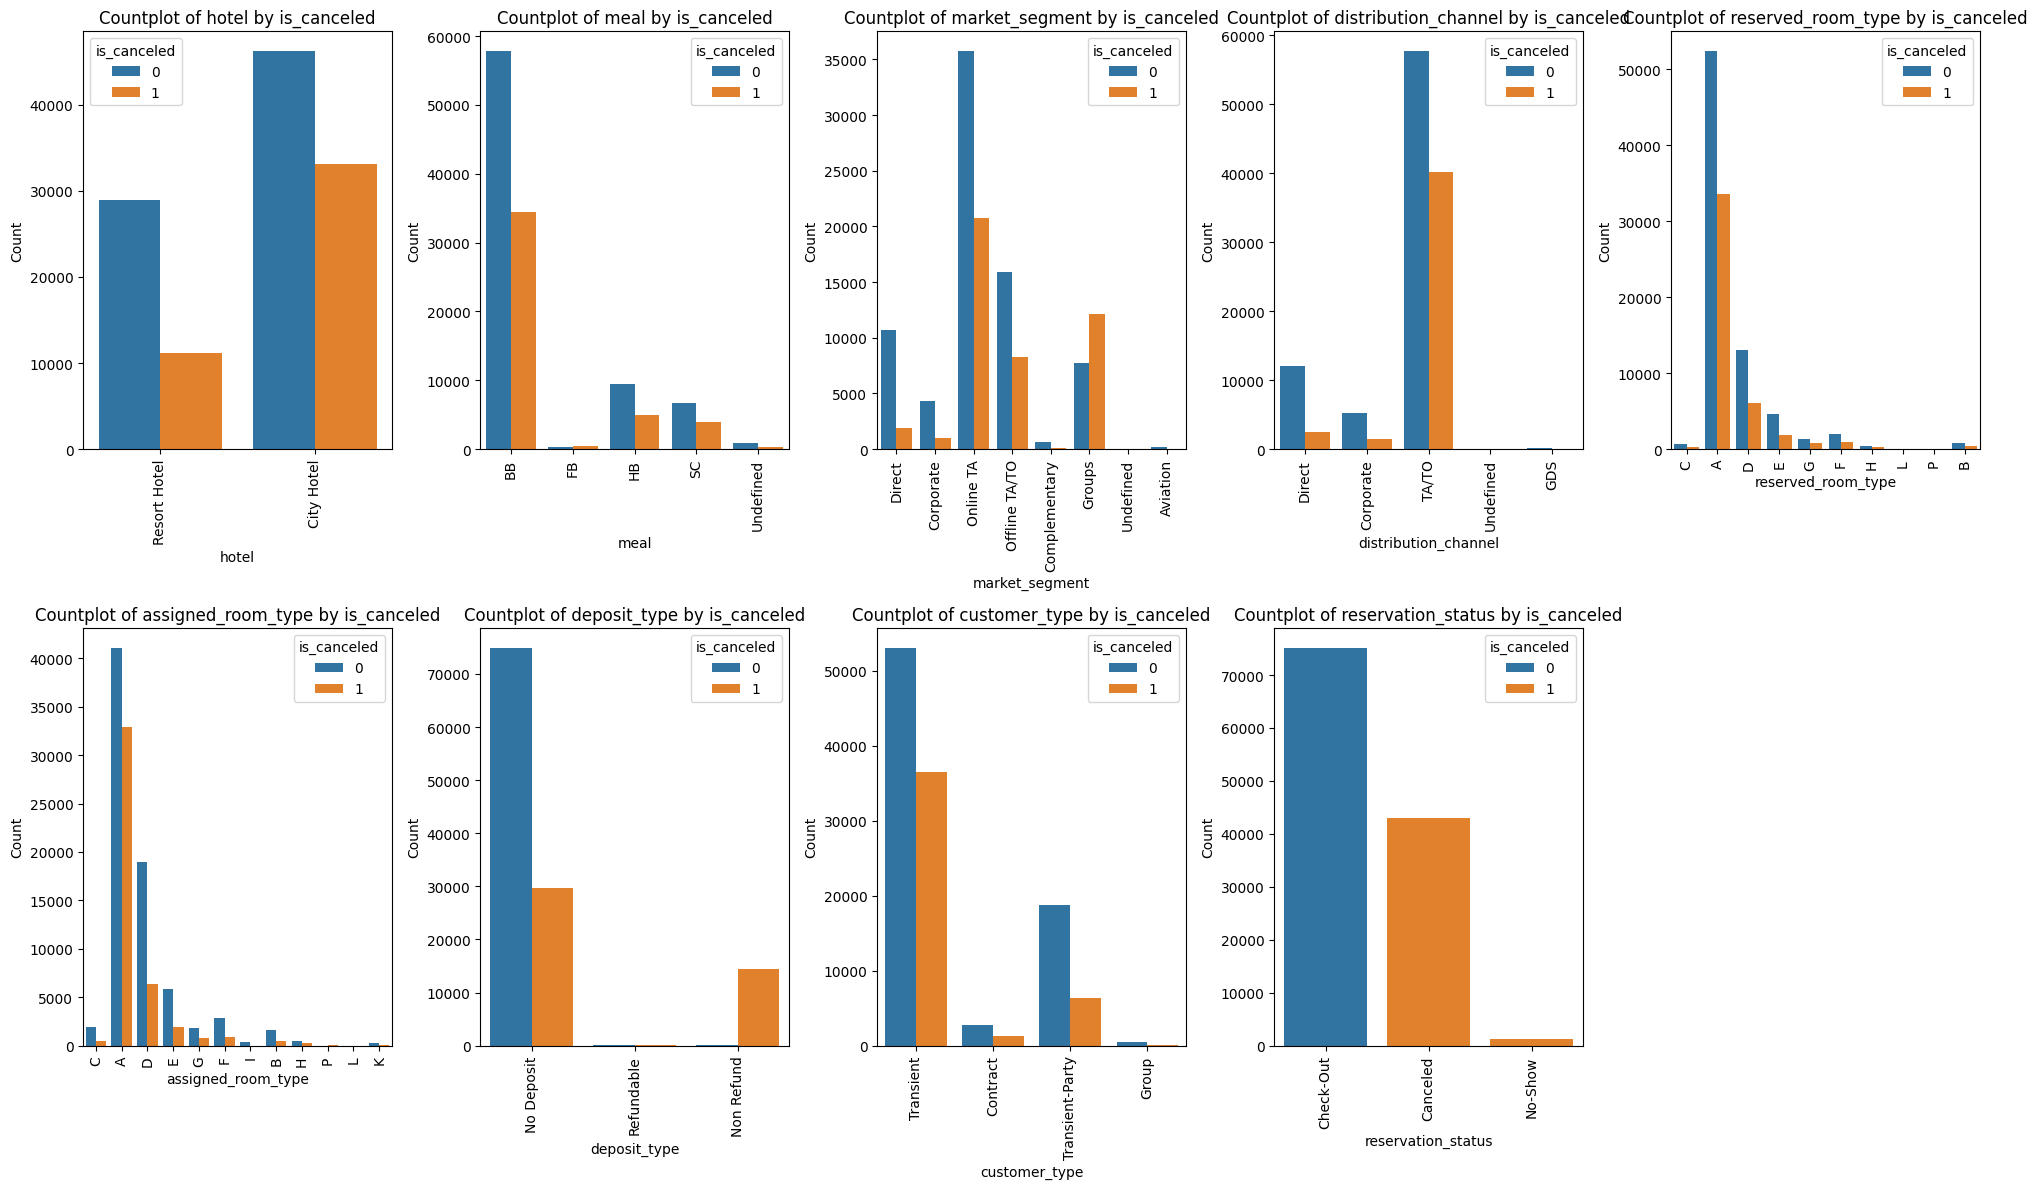

In [12]:
# Countplots for categorical columns broken down by the target variable 'is_canceled'

num_plots_cat = len(categorical_cols)
num_cols_cat = 5
num_rows_cat = -(-num_plots_cat // num_cols_cat)

fig, axes = plt.subplots(num_rows_cat, num_cols_cat, figsize=(20, 6*num_rows_cat))
for i, col in enumerate(categorical_cols):
    row_idx = i // num_cols_cat
    col_idx = i % num_cols_cat
    ax = axes[row_idx, col_idx] if num_rows_cat > 1 else axes[col_idx]
    
    sns.countplot(x=col, hue='is_canceled', data=df, ax=ax)
    ax.set_xlabel(col)
    ax.set_ylabel('Count')
    ax.set_title(f'Countplot of {col} by is_canceled')
    ax.tick_params(axis='x', rotation=90)

for i in range(num_plots_cat, num_rows_cat * num_cols_cat):
    row_idx = i // num_cols_cat
    col_idx = i % num_cols_cat
    axes[row_idx, col_idx].axis('off')

plt.tight_layout()
plt.show()

<Axes: xlabel='reservation_status', ylabel='count'>

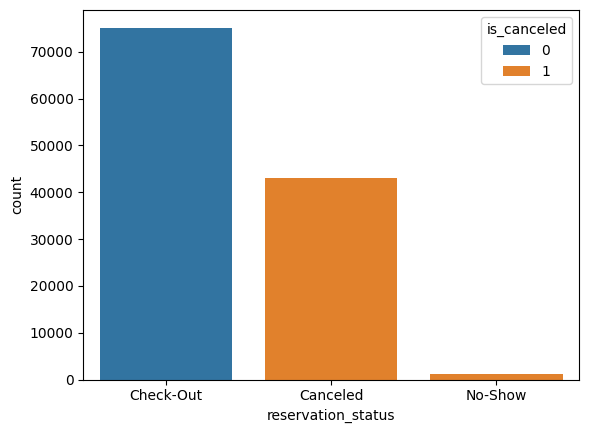

In [13]:
sns.countplot(x='reservation_status', hue='is_canceled', data=df)

C:\Users\sidha\AppData\Local\Temp\ipykernel_2420\2622462829.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


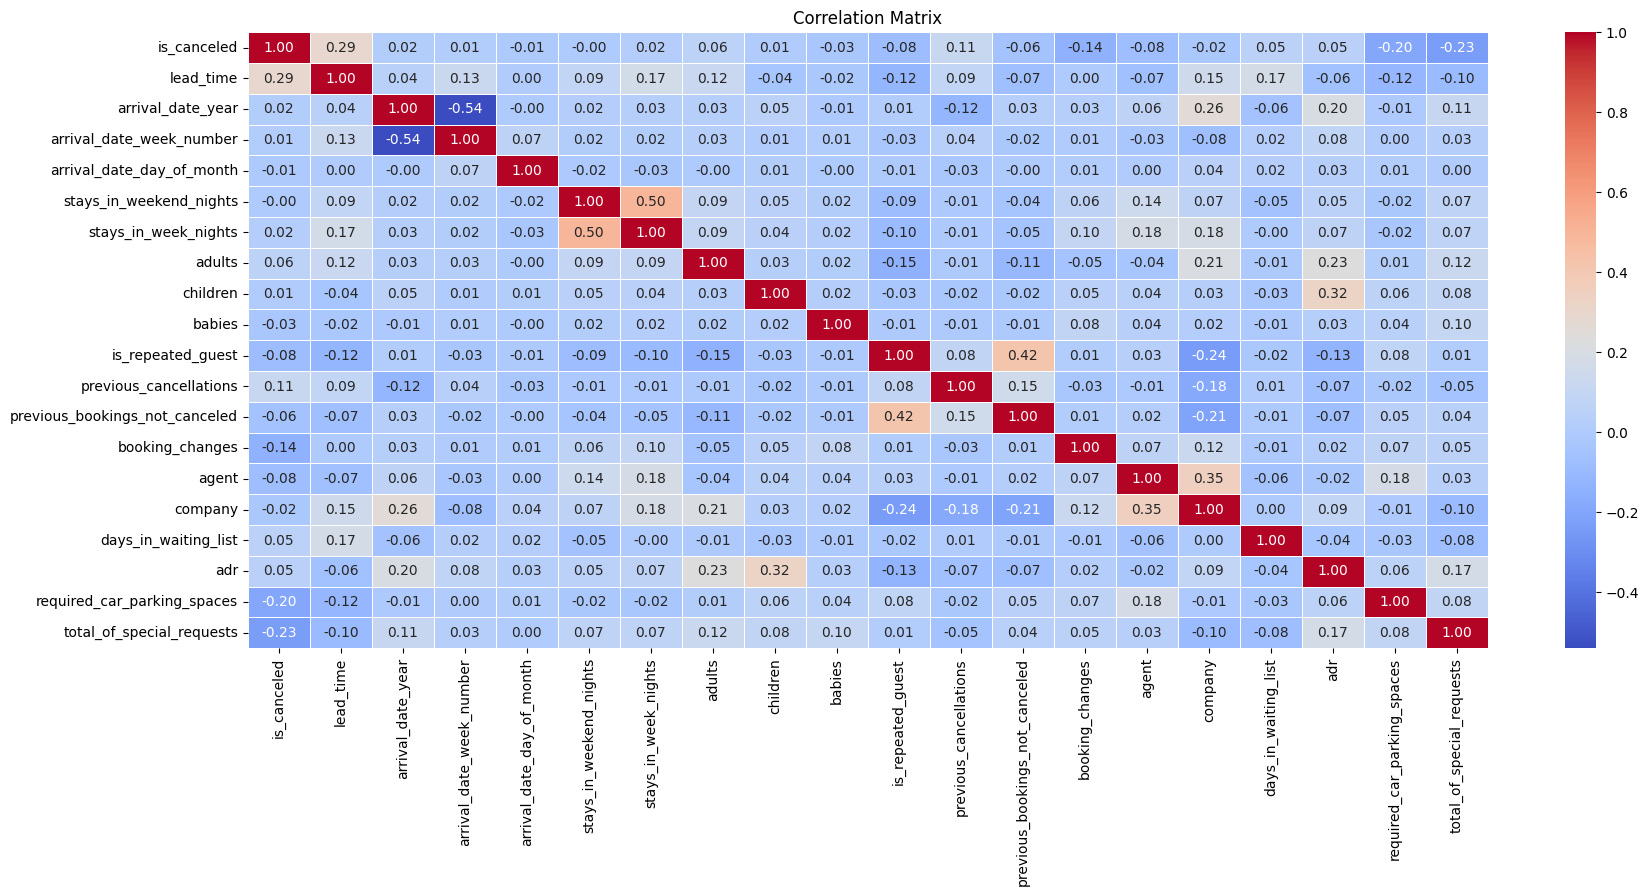

In [14]:
# correlation matrix

correlation_matrix = df.corr()
plt.figure(figsize=(20,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

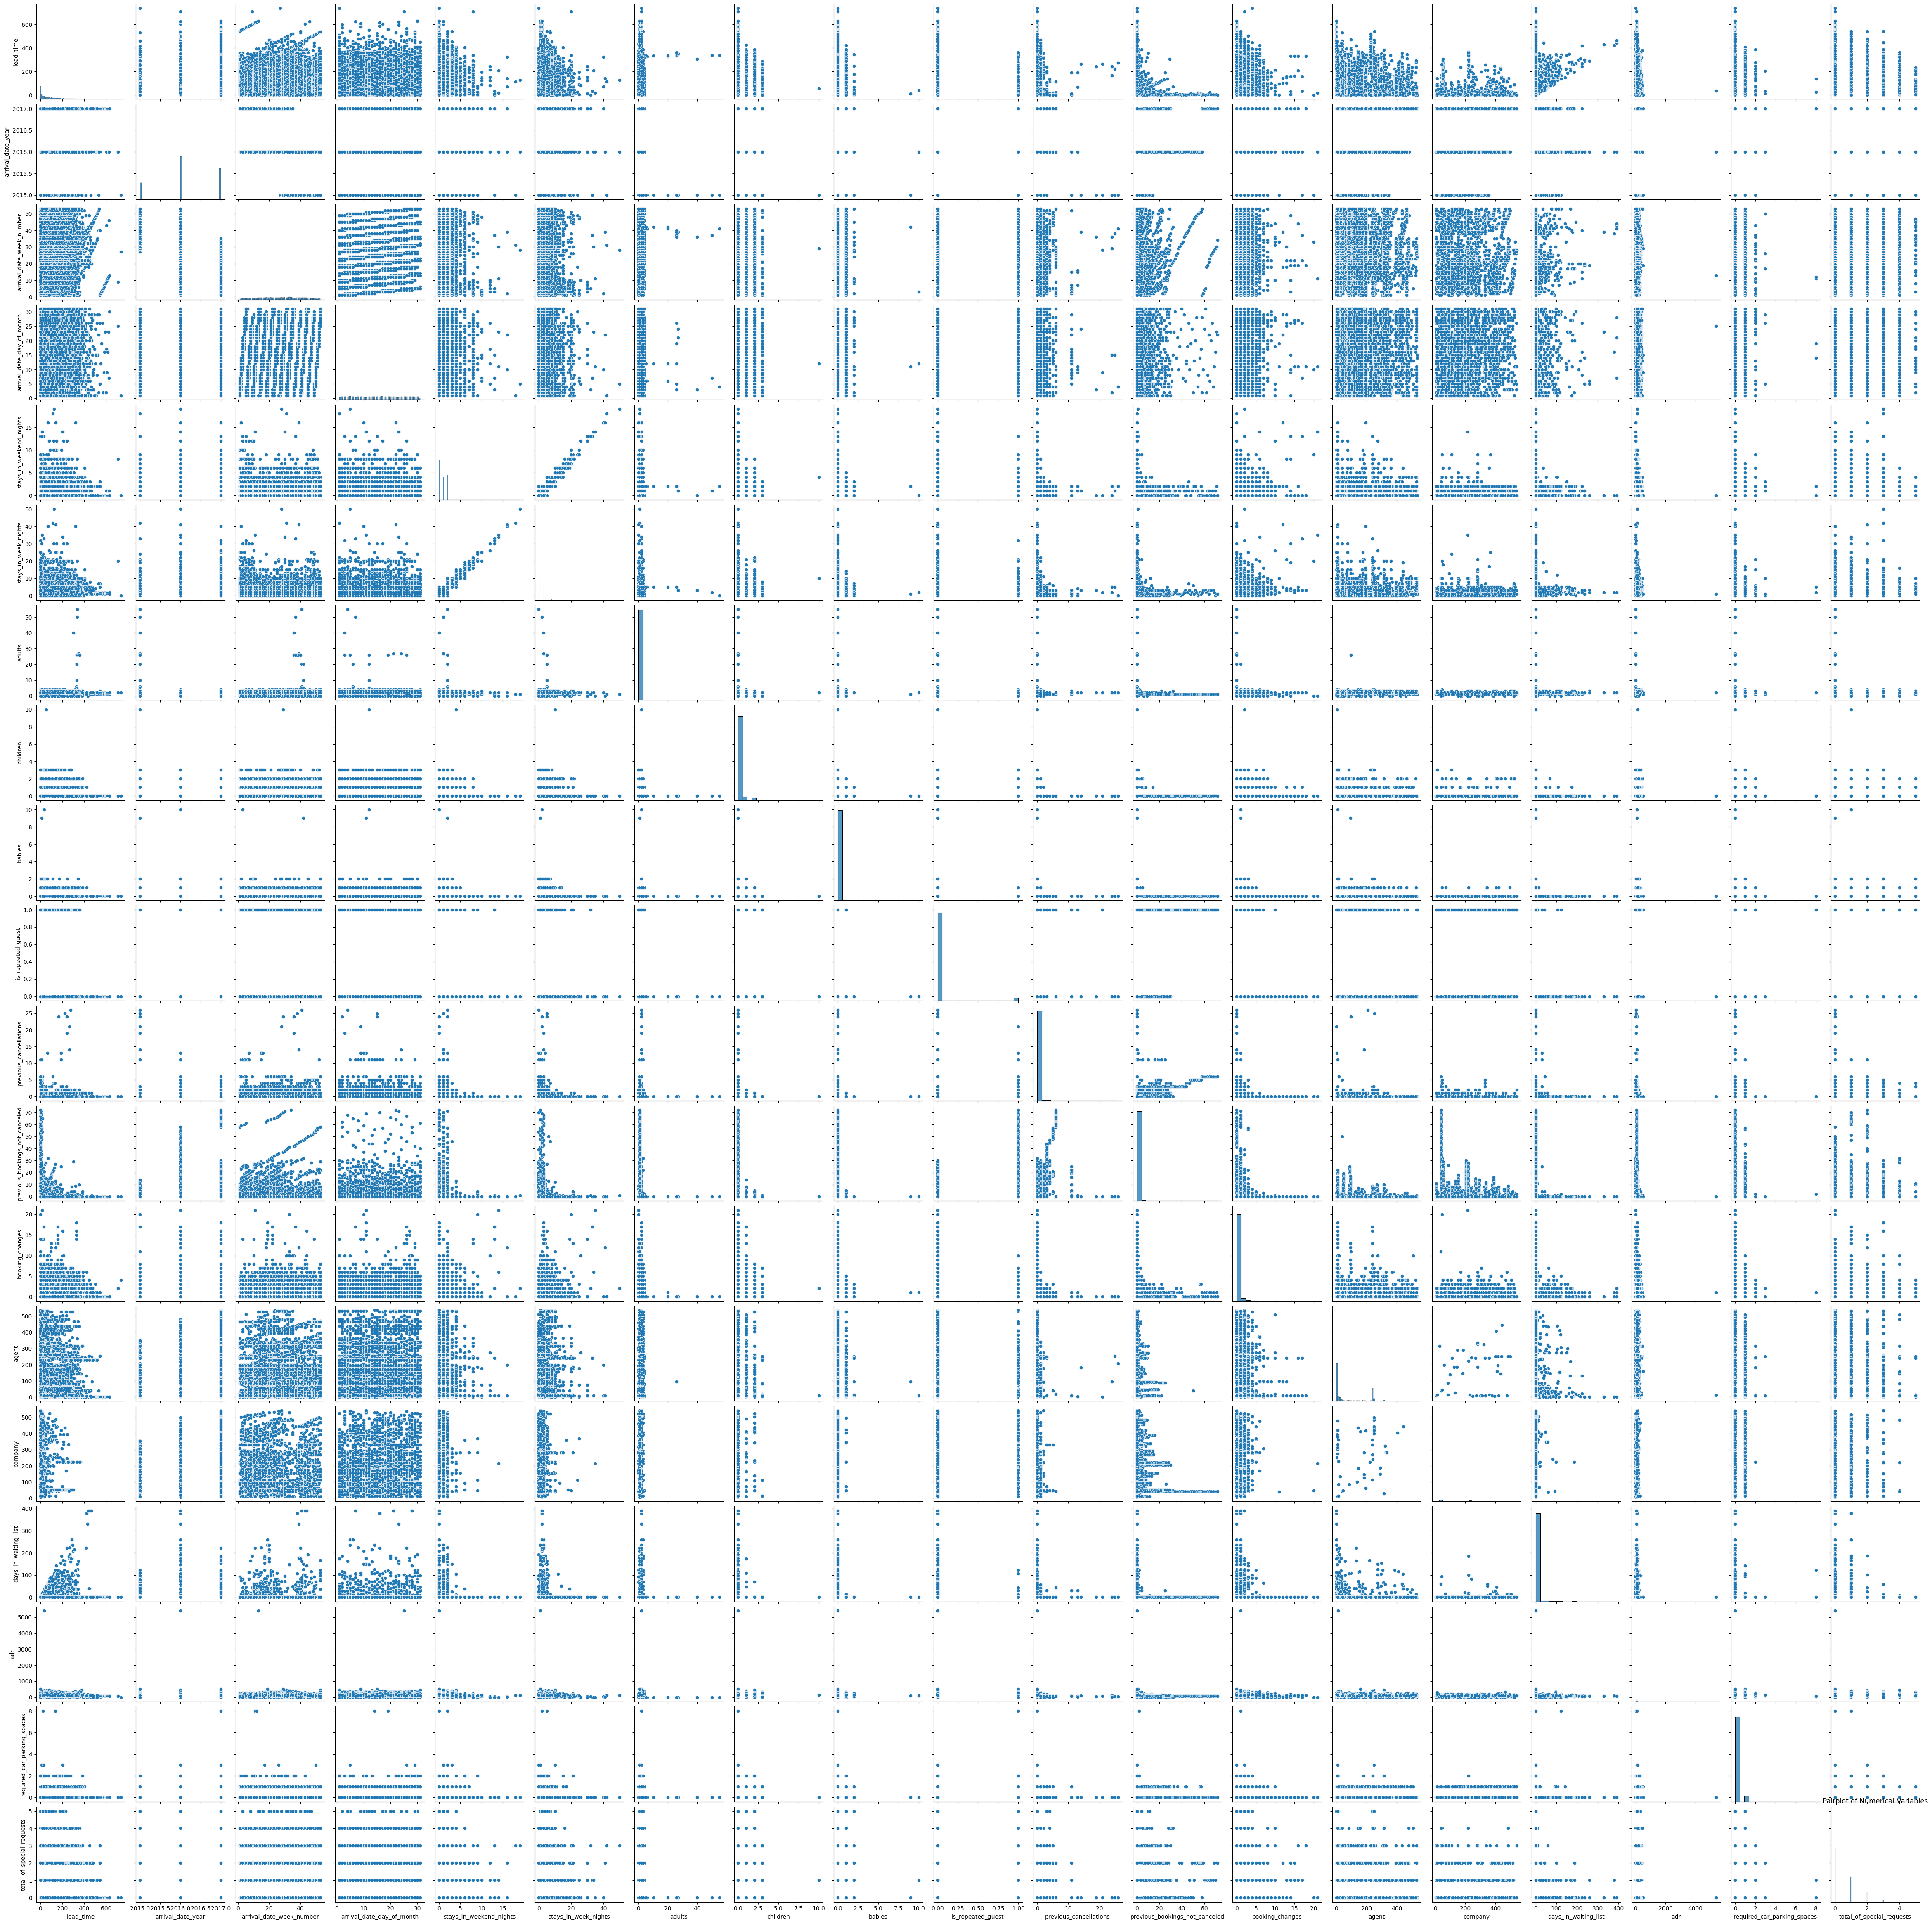

In [15]:
# plotting pairplots

sns.pairplot(df.drop(columns = 'is_canceled'))
plt.title('Pairplot of Numerical Variables')
plt.show()

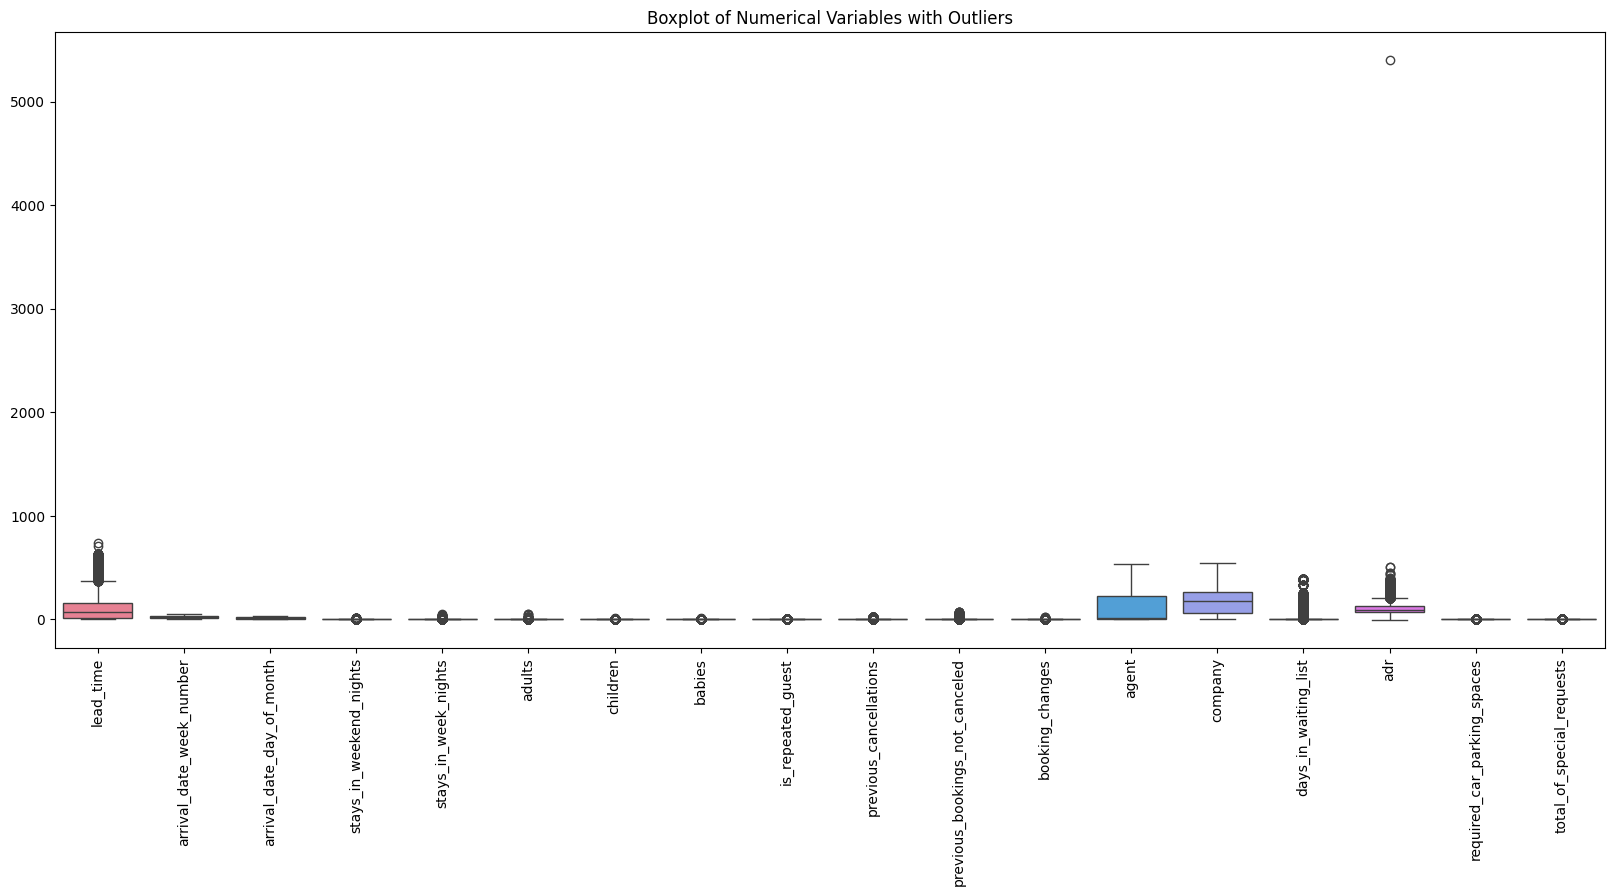

In [16]:
# plotting outliers

plt.figure(figsize=(20, 8))
sns.boxplot(data=df.drop(columns = ['arrival_date_year', 'is_canceled']), showfliers=True)
plt.title('Boxplot of Numerical Variables with Outliers')
plt.xticks(rotation=90)
plt.show()

<Axes: >

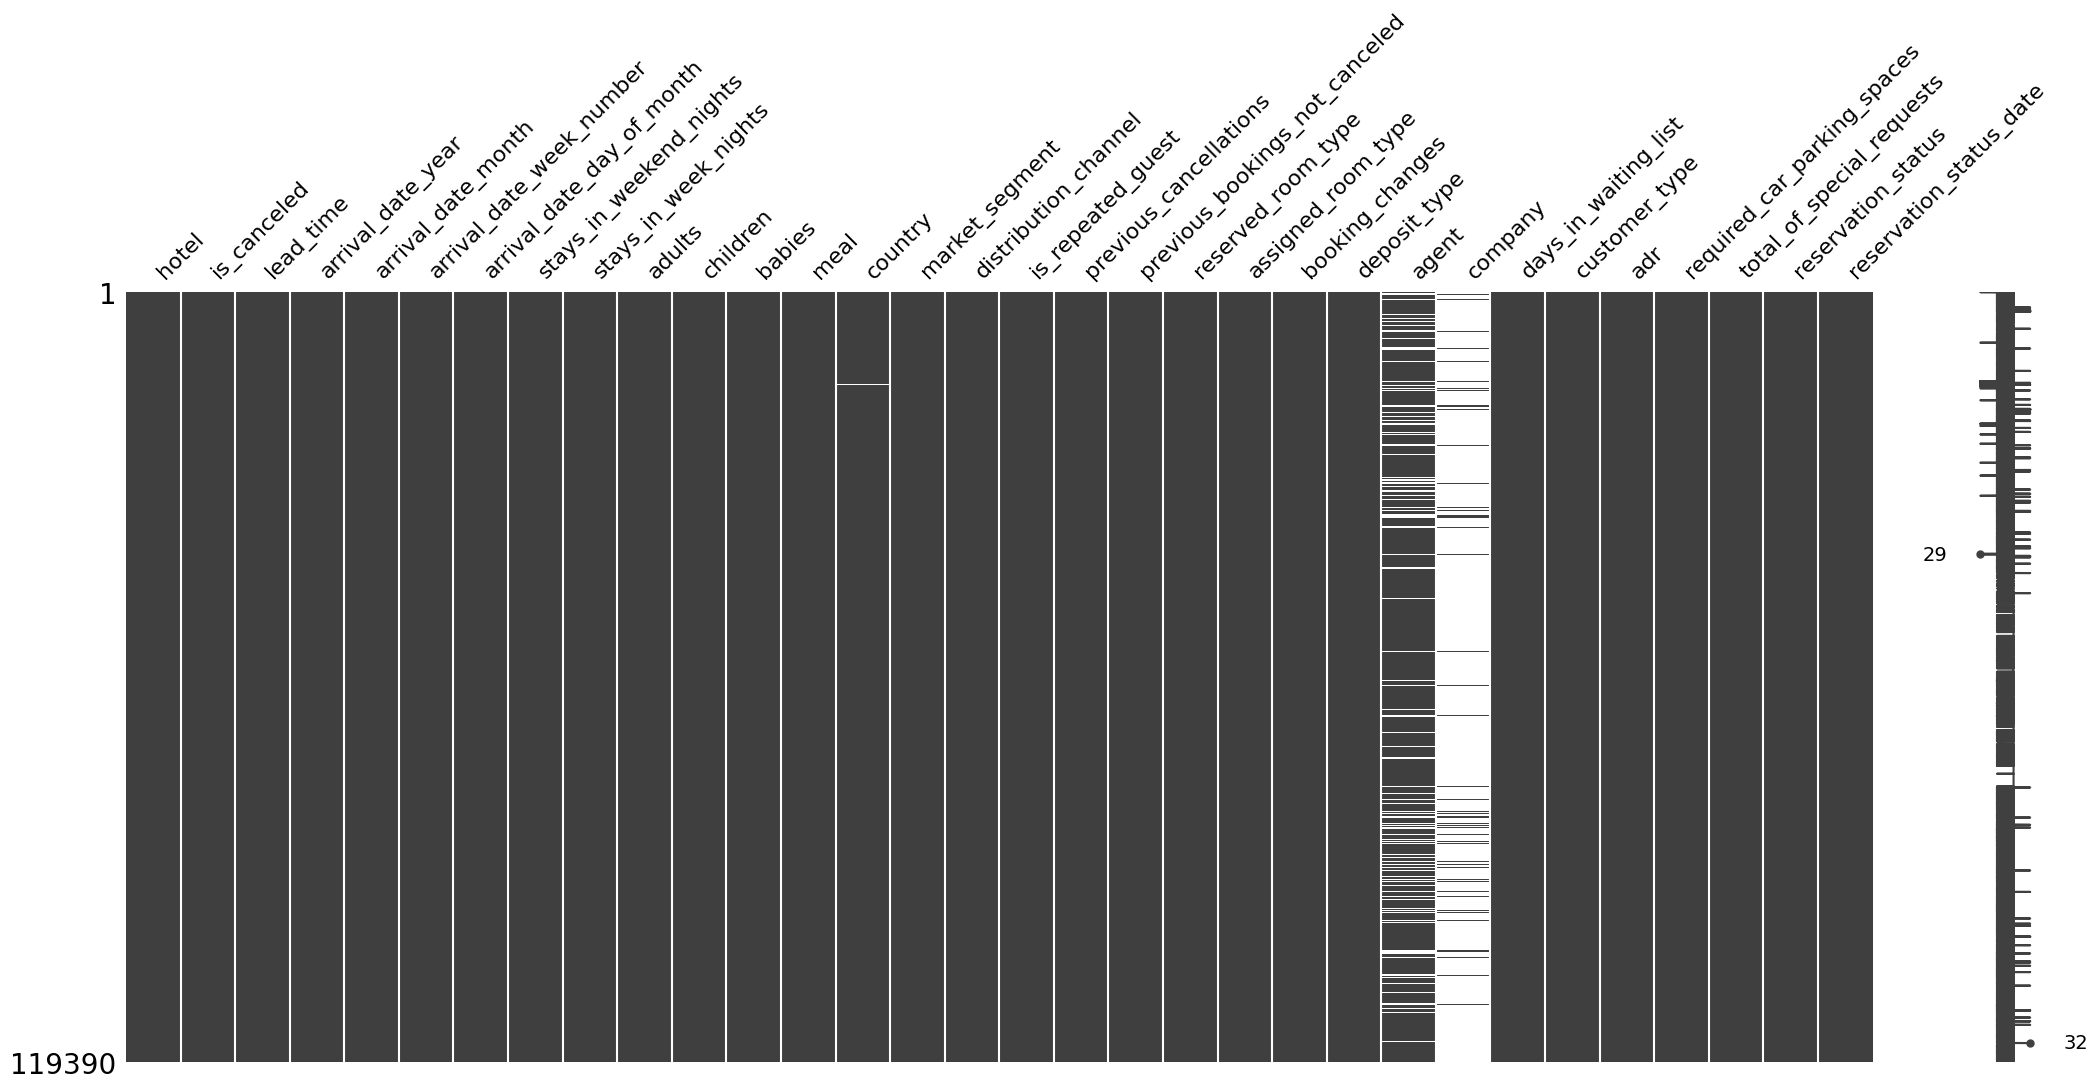

In [17]:
# visualizing the missing values

msno.matrix(df)

## Finding the time lag between prediction time and ground truth obtention time

In [18]:
df['arrival_date'] = pd.to_datetime(df['arrival_date_year'].astype(str) + '-' +
                                        df['arrival_date_month'] + '-' +
                                        df['arrival_date_day_of_month'].astype(str), format='%Y-%B-%d')
df['booking_date'] = (df['arrival_date'] - pd.to_timedelta(df['lead_time'], unit='d')).dt.date
df['booking_date'] = pd.to_datetime(df['booking_date'])
print(df.shape)
df.head()

(119390, 34)


hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  company  \
0                        0                     0       2  ...      NaN   
1                        0                     0       2  ...      NaN   
2                        0                     1       1  ...      NaN   
3                        0                     1       1  ...      NaN   
4                        0                     2       2  ...      NaN   

   days_in_waiting_list customer_type   adr required_car_parking_spaces  \
0                     0     Transient   0.0                           0   
1                     0     Transient   0.0                           0   
2                     0     Transient  75.0                           0   
3                     0     Transient  75.0                           0   
4                     0     Transient  98.0                           0   

  total_of_special_requests  reservation_status  reservation_status_date  \
0                         0           Check-Out               2015-07-01   
1                         0           Check-Out               2015-07-01   
2                         0           Check-Out               2015-07-02   
3                         0           Check-Out               2015-07-02   
4                         1           Check-Out               2015-07-03   

   arrival_date booking_date  
0    2015-07-01   2014-07-24  
1    2015-07-01   2013-06-24  
2    2015-07-01   2015-06-24  
3    2015-07-01   2015-06-18  
4    2015-07-01   2015-06-17  

[5 rows x 34 columns]

In [19]:
df['difference_in_days'] = (df['arrival_date'] - df['booking_date']).dt.days
print(df.shape)
df.head()

(119390, 35)


hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  \
0                        0                     0       2  ...   
1                        0                     0       2  ...   
2                        0                     1       1  ...   
3                        0                     1       1  ...   
4                        0                     2       2  ...   

   days_in_waiting_list  customer_type   adr required_car_parking_spaces  \
0                     0      Transient   0.0                           0   
1                     0      Transient   0.0                           0   
2                     0      Transient  75.0                           0   
3                     0      Transient  75.0                           0   
4                     0      Transient  98.0                           0   

  total_of_special_requests reservation_status  reservation_status_date  \
0                         0          Check-Out               2015-07-01   
1                         0          Check-Out               2015-07-01   
2                         0          Check-Out               2015-07-02   
3                         0          Check-Out               2015-07-02   
4                         1          Check-Out               2015-07-03   

   arrival_date  booking_date difference_in_days  
0    2015-07-01    2014-07-24                342  
1    2015-07-01    2013-06-24                737  
2    2015-07-01    2015-06-24                  7  
3    2015-07-01    2015-06-18                 13  
4    2015-07-01    2015-06-17                 14  

[5 rows x 35 columns]

In [20]:
df['difference_in_days'].describe()

count    119390.000000
mean        104.011416
std         106.863097
min           0.000000
25%          18.000000
50%          69.000000
75%         160.000000
max         737.000000
Name: difference_in_days, dtype: float64

In [21]:
df['difference_in_days'].median()

69.0

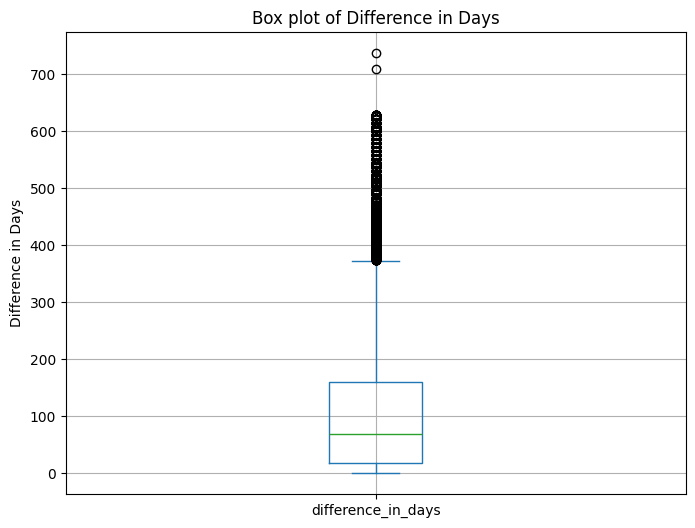

In [22]:
plt.figure(figsize=(8, 6)) 
df['difference_in_days'].plot(kind='box')
plt.title('Box plot of Difference in Days')
plt.ylabel('Difference in Days')
plt.grid(True)
plt.show()